# Notebook for cognitive flexibility and neuroptimal

This is the script for the HDDMrl analysis of the performance in the PRL task for the two groups. 

In [ ]:
# For a tutorial, see: 
# https://github.com/madslupe/hddm/blob/master/hddm/examples/RLHDDMtutorial.ipynb

In [1]:
#import
import sys
from kabuki.analyze import gelman_rubin
import pandas as pd
import numpy as np
import hddm
print(hddm.__version__)
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import pymc
import kabuki
sns.set(style="ticks", color_codes=True)
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning)
from tqdm import tqdm # progress tracker
from patsy import dmatrix

/opt/anaconda3/envs/hddmpy36/lib/python3.6/site-packages/IPython/parallel.py:13: ShimWarning: The `IPython.parallel` package has been deprecated since IPython 4.0. You should import from ipyparallel instead.
  "You should import from ipyparallel instead.", ShimWarning)


0.8.0


In [2]:
print('Notebook is running:', sys.executable)
# further check your python version
from platform import python_version
print('The current Python version is', python_version())
print('The current HDDM version is', hddm.__version__) # 0.8.0

Notebook is running: /opt/anaconda3/envs/hddmpy36/bin/python
The current Python version is 3.6.10
The current HDDM version is 0.8.0


In [3]:
# Load data from csv file into a NumPy structured array
data = hddm.load_csv('input_for_hddm.csv')

There are 51 participants.


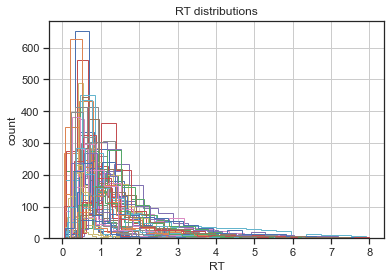

In [4]:
# Uncomment the codes below if you are interested in checking the distribution of raw data
# plot and save the distribution of raw data:
fig = plt.figure()
ax = fig.add_subplot(111, xlabel='RT', ylabel='count', title='RT distributions')
for i, subj_data in data.groupby('subj_idx'):
    subj_data.rt.hist(bins=20, histtype='step', ax=ax)
# plt.savefig('plot_hist_rt_patients.pdf')

print('There are %d participants.' %data['subj_idx'].nunique())

In [5]:
data.head()

,response,rt,trial,feedback,subj_code,is_neuroptimal,block,q_init,split_by,time,subj_idx
0,0,0.749461,1,1,neurOptimRevLearn_low_s001,1,0,0.5,2,0,1
1,0,0.568736,2,1,neurOptimRevLearn_low_s001,1,0,0.5,2,0,1
2,0,0.703596,3,1,neurOptimRevLearn_low_s001,1,0,0.5,2,0,1
3,0,0.638820,4,1,neurOptimRevLearn_low_s001,1,0,0.5,2,0,1
4,0,0.613687,5,1,neurOptimRevLearn_low_s001,1,0,0.5,2,0,1


In [6]:
mod = hddm.HDDMrl(
  data,
  bias = True,
   depends_on = {
      'a':['time', 'is_neuroptimal'],
      'v':['time', 'is_neuroptimal'],
      't':['time', 'is_neuroptimal'],
      'z':['time', 'is_neuroptimal'],
      'alpha':['time', 'is_neuroptimal'],
      'pos_alpha':['time', 'is_neuroptimal']
     },
  dual = True, # separate learning rates for pos/neg feedbacks
  p_outlier = 0.05
)

In [7]:
mod.find_starting_values()

/opt/anaconda3/envs/hddmpy36/lib/python3.6/site-packages/scipy/optimize/optimize.py:2116: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)


In [8]:
mod.sample(4000, burn=2000, dbname='traces.db', db='pickle')

 [-----------------100%-----------------] 4001 of 4000 complete in 2553.2 sec

In [9]:
mod.print_stats()

                               mean         std         2.5q         25q         50q         75q       97.5q       mc err
a(0.0)                      1.95845    0.152665      1.66377     1.85598       1.956     2.06574     2.26162    0.0036979
a(0.2)                       1.8469    0.154738      1.54561     1.74551     1.84253      1.9536     2.14419   0.00355289
a(1.0)                      1.96972   0.0929885      1.78143     1.90434     1.97086     2.03289     2.15091   0.00212787
a(1.1)                      1.92203   0.0904994       1.7379      1.8614     1.92537     1.98022     2.09841   0.00218992
a(1.2)                      1.89908   0.0874099      1.72647     1.84066     1.90105     1.95681      2.0752   0.00208398
a_std                      0.586528   0.0374176     0.517628    0.560558    0.583877    0.609886    0.668241   0.00111018
a_subj(0.0).39              1.10599   0.0400749      1.02946     1.07857     1.10494     1.13236     1.18719   0.00137059
a_subj(0.2).39          

In [17]:
traces = mod.get_traces()

In [18]:
mod.plot_posteriors(['alpha', 'pos_alpha'])

AttributeError: module 'pymc' has no attribute 'Matplot'

In [13]:
mod.plot_posterior_predictive(figsize=(14, 10))

<Figure size 1008x720 with 0 Axes>

<Figure size 1008x720 with 0 Axes>

<Figure size 1008x720 with 0 Axes>

<Figure size 1008x720 with 0 Axes>

<Figure size 1008x720 with 0 Axes>

In [21]:
alpha_00, alpha_02 = mod.nodes_db.node[['alpha(0.0)', 'alpha(0.2)']]

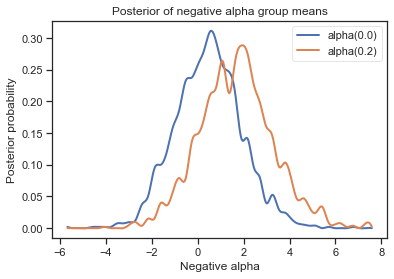

In [22]:
hddm.analyze.plot_posterior_nodes([alpha_00, alpha_02])
plt.xlabel('Negative alpha')
plt.ylabel('Posterior probability')
plt.title('Posterior of negative alpha group means')
# plt.savefig('plot_neg_alpha_patients.pdf')

In [23]:
alpha_10, alpha_12 = mod.nodes_db.node[['alpha(1.0)', 'alpha(1.2)']]

Text(0.5, 1.0, 'Posterior of negative alpha group means')

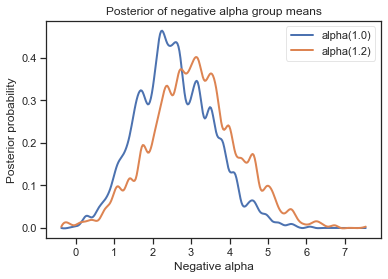

In [24]:
hddm.analyze.plot_posterior_nodes([alpha_10, alpha_12])
plt.xlabel('Negative alpha')
plt.ylabel('Posterior probability')
plt.title('Posterior of negative alpha group means')
# plt.savefig('plot_neg_alpha_patients.pdf')

Text(0.5, 1.0, 'Posterior of negative alpha group means')

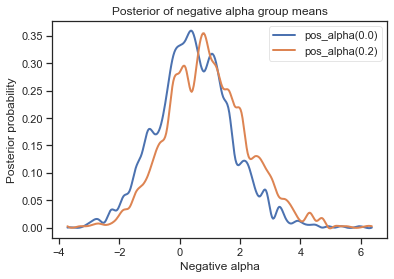

In [26]:
pos_alpha_00, pos_alpha_02 = mod.nodes_db.node[['pos_alpha(0.0)', 'pos_alpha(0.2)']]
hddm.analyze.plot_posterior_nodes([pos_alpha_00, pos_alpha_02])
plt.xlabel('Negative alpha')
plt.ylabel('Posterior probability')
plt.title('Posterior of negative alpha group means')
# plt.savefig('plot_neg_alpha_patients.pdf')

Text(0.5, 1.0, 'Posterior of negative alpha group means')

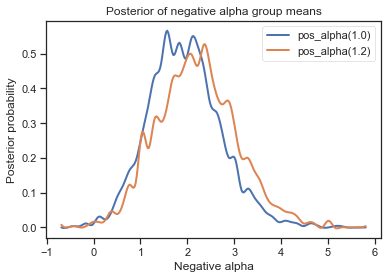

In [28]:
pos_alpha_10, pos_alpha_12 = mod.nodes_db.node[['pos_alpha(1.0)', 'pos_alpha(1.2)']]
hddm.analyze.plot_posterior_nodes([pos_alpha_10, pos_alpha_12])
plt.xlabel('Negative alpha')
plt.ylabel('Posterior probability')
plt.title('Posterior of negative alpha group means')
# plt.savefig('plot_neg_alpha_patients.pdf')

Text(0.5, 1.0, 'Posterior of drift rate time points means - controls')

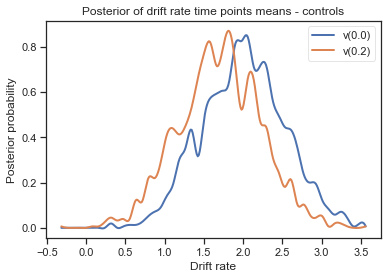

In [33]:
v_00, v_02 = mod.nodes_db.node[['v(0.0)', 'v(0.2)']]
hddm.analyze.plot_posterior_nodes([v_00, v_02])
plt.xlabel('Drift rate')
plt.ylabel('Posterior probability')
plt.title('Posterior of drift rate time points means - controls')
# plt.savefig('plot_neg_alpha_patients.pdf')

Text(0.5, 1.0, 'Posterior of drift rate time points means - treatmenet')

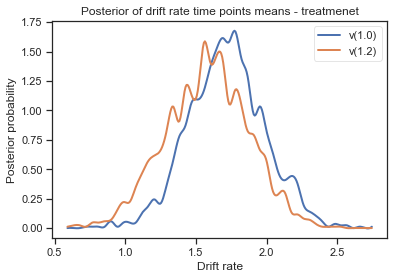

In [34]:
v_10, v_12 = mod.nodes_db.node[['v(1.0)', 'v(1.2)']]
hddm.analyze.plot_posterior_nodes([v_10, v_12])
plt.xlabel('Drift rate')
plt.ylabel('Posterior probability')
plt.title('Posterior of drift rate time points means - treatmenet')
# plt.savefig('plot_neg_alpha_patients.pdf')

Text(0.5, 1.0, 'Posterior of Non-decision time pre-post means - controls')

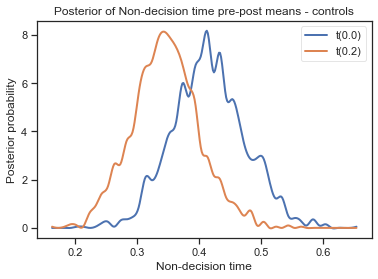

In [35]:
t_00, t_02 = mod.nodes_db.node[['t(0.0)', 't(0.2)']]
hddm.analyze.plot_posterior_nodes([t_00, t_02])
plt.xlabel('Non-decision time')
plt.ylabel('Posterior probability')
plt.title('Posterior of Non-decision time pre-post means - controls')
# plt.savefig('plot_neg_alpha_patients.pdf')

Text(0.5, 1.0, 'Posterior of Non-decision time pre-post means - treatment')

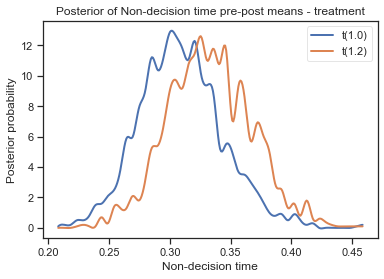

In [36]:
t_10, t_12 = mod.nodes_db.node[['t(1.0)', 't(1.2)']]
hddm.analyze.plot_posterior_nodes([t_10, t_12])
plt.xlabel('Non-decision time')
plt.ylabel('Posterior probability')
plt.title('Posterior of Non-decision time pre-post means - treatment')
# plt.savefig('plot_neg_alpha_patients.pdf')

Text(0.5, 1.0, 'Posterior of decision criterion pre-post means - controls')

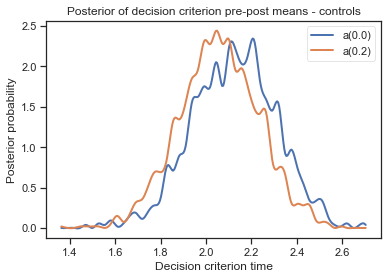

In [37]:
a_00, a_02 = mod.nodes_db.node[['a(0.0)', 'a(0.2)']]
hddm.analyze.plot_posterior_nodes([a_00, a_02])
plt.xlabel('Decision criterion time')
plt.ylabel('Posterior probability')
plt.title('Posterior of decision criterion pre-post means - controls')
# plt.savefig('plot_neg_alpha_patients.pdf')

Text(0.5, 1.0, 'Posterior of decision criterion pre-post means - treatment')

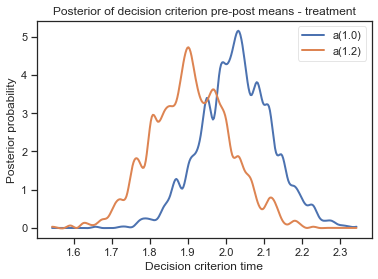

In [38]:
a_10, a_12 = mod.nodes_db.node[['a(1.0)', 'a(1.2)']]
hddm.analyze.plot_posterior_nodes([a_10, a_12])
plt.xlabel('Decision criterion time')
plt.ylabel('Posterior probability')
plt.title('Posterior of decision criterion pre-post means - treatment')
# plt.savefig('plot_neg_alpha_patients.pdf')

In [40]:
print("P(a t0 controls < a t2 controls) = ", (a_00.trace() < a_02.trace()).mean());
print("P(a t0 treatment < a t2 treatment) = ", (a_10.trace() < a_12.trace()).mean());

P(a t0 controls < a t2 controls) =  0.393
P(a t0 treatment < a t2 treatment) =  0.177


In [148]:
pos_alpha_food, pos_alpha_social = model3.nodes_db.node[['pos_alpha(data_food)', 'pos_alpha(data_social)']]

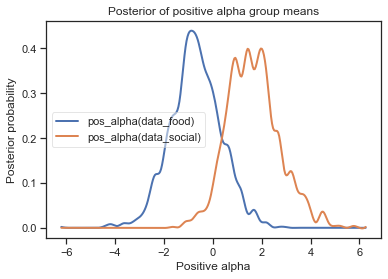

In [150]:
hddm.analyze.plot_posterior_nodes([pos_alpha_food, pos_alpha_social])
plt.xlabel('Positive alpha')
plt.ylabel('Posterior probability')
plt.title('Posterior of positive alpha group means')
plt.savefig('plot_pos_alpha_patients.pdf')

In [117]:
print("P(negative alpha_social > negative alpha_food) = ", (alpha_social.trace() > alpha_food.trace()).mean());
print("P(positive alpha_social > positive alpha_food) = ", (pos_alpha_social.trace() > pos_alpha_food.trace()).mean());

P(negative alpha_social > negative alpha_food) =  0.785
P(positive alpha_social > positive alpha_food) =  0.9595


In [68]:
a_food, a_social = model3.nodes_db.node[['a(data_food)', 'a(data_social)']]
print("P(a_food > a_social) = ", (a_food.trace() > a_social.trace()).mean());

P(a_food > a_social) =  0.9665


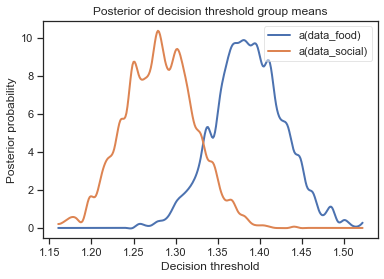

In [134]:
a_food, a_social = model3.nodes_db.node[['a(data_food)', 'a(data_social)']]

hddm.analyze.plot_posterior_nodes([a_food, a_social])
plt.xlabel('Decision threshold')
plt.ylabel('Posterior probability')
plt.title('Posterior of decision threshold group means')
plt.savefig('plot_a_patients.pdf')

In [123]:
v_food, v_social = model3.nodes_db.node[['v(data_food)', 'v(data_social)']]
print("P(v_food > v_social) = ", (v_food.trace() > v_social.trace()).mean());

P(v_food > v_social) =  0.609


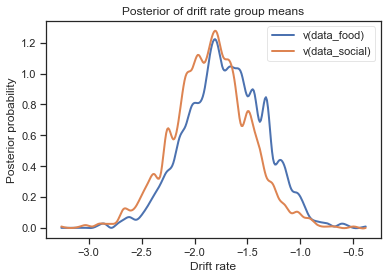

In [141]:
v_food, v_social = model3.nodes_db.node[['v(data_food)', 'v(data_social)']]

hddm.analyze.plot_posterior_nodes([v_food, v_social])
plt.xlabel('Drift rate')
plt.ylabel('Posterior probability')
plt.title('Posterior of drift rate group means')
plt.savefig('plot_v_patients.pdf')

In [125]:
t_food, t_social = model3.nodes_db.node[['t(data_food)', 't(data_social)']]
print("P(t_food > t_social) = ", (t_food.trace() > t_social.trace()).mean());

P(t_food > t_social) =  0.1815


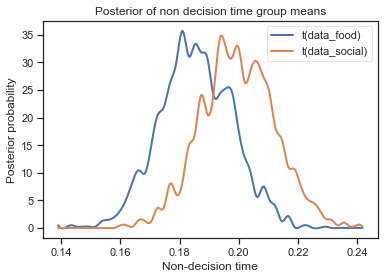

In [139]:
t_food, t_social = model3.nodes_db.node[['t(data_food)', 't(data_social)']]

hddm.analyze.plot_posterior_nodes([t_food, t_social])
plt.xlabel('Non-decision time')
plt.ylabel('Posterior probability')
plt.title('Posterior of non decision time group means')
plt.savefig('plot_t_patients.pdf')

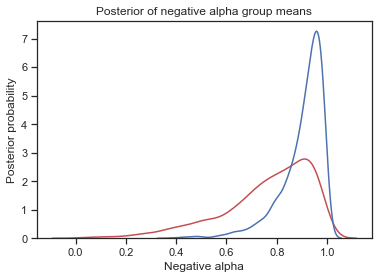

In [120]:
neg_alpha_food = np.exp(traces['alpha(data_food)'])/(1+np.exp(traces['alpha(data_food)']))
neg_alpha_soc = np.exp(traces['alpha(data_social)'])/(1+np.exp(traces['alpha(data_social)']))
sns.kdeplot(neg_alpha_food, color='r', label="neg alpha food: " + str(np.round(np.mean(neg_alpha_food),3)))
sns.kdeplot(neg_alpha_soc, color='b', label="neg alpha social: " + str(np.round(np.mean(neg_alpha_soc),3)))

plt.xlabel('Negative alpha')
plt.ylabel('Posterior probability')
plt.title('Posterior of negative alpha group means')
plt.savefig('plot_neg_alpha_patients_trasf.pdf')

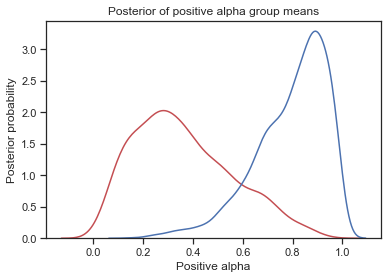

In [121]:
pos_alpha_food = np.exp(traces['pos_alpha(data_food)'])/(1+np.exp(traces['pos_alpha(data_food)']))
pos_alpha_soc  = np.exp(traces['pos_alpha(data_social)'])/(1+np.exp(traces['pos_alpha(data_social)']))
sns.kdeplot(pos_alpha_food, color='r', label="pos alpha food: " + str(np.round(np.mean(pos_alpha_food),3)))
sns.kdeplot(pos_alpha_soc, color='b', label="pos alpha social: " + str(np.round(np.mean(pos_alpha_soc),3)))

plt.xlabel('Positive alpha')
plt.ylabel('Posterior probability')
plt.title('Posterior of positive alpha group means')
plt.savefig('plot_pos_alpha_patients.pdf')

In [54]:
model3.plot_posterior_predictive()

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

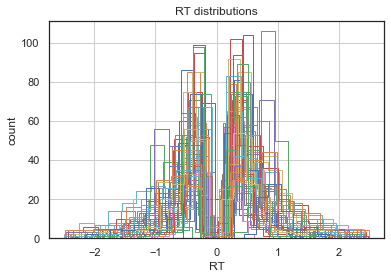

In [29]:
# data = hddm.utils.flip_errors(data)

#fig = plt.figure()
#ax = fig.add_subplot(111, xlabel='RT', ylabel='count', title='RT distributions')
#for i, subj_data in data.groupby('subj_idx'):
#    subj_data.rt.hist(bins=20, histtype='step', ax=ax)


In [22]:
datac = hddm.load_csv('/Users/corrado/Documents/papers/ED_patients/data/processed/prl/data_for_hddm/prl_controls_only.csv')

In [23]:
datac.head()

,subj_idx,response,stim,rt,trial,feedback,group,subj_name,q_init,split_by
0,1,0,data_food,1.779,0,1,controls,ad_pi_1993_11_30_260_f,0.5,0
1,1,0,data_food,0.382,1,1,controls,ad_pi_1993_11_30_260_f,0.5,0
2,1,0,data_food,0.399,2,1,controls,ad_pi_1993_11_30_260_f,0.5,0
3,1,0,data_food,0.423,3,1,controls,ad_pi_1993_11_30_260_f,0.5,0
4,1,0,data_food,0.345,4,1,controls,ad_pi_1993_11_30_260_f,0.5,0


In [24]:
model4 = hddm.HDDMrl(
  datac,
  bias = True,
  depends_on = {
      'a':['stim'],
      'v':['stim'],
      't':['stim'],
      'alpha':['stim'],
      'pos_alpha':['stim']
     },
  dual = True, # separate learning rates for pos/neg feedbacks
  p_outlier = 0.05
)

In [25]:
model4.find_starting_values()

/Users/corrado/opt/miniconda3/envs/hddmpy38/lib/python3.8/site-packages/scipy/optimize/optimize.py:2215: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)


In [26]:
model4.sample(3000, burn=1000, dbname='traces.db', db='pickle')

 [-----------------100%-----------------] 3001 of 3000 complete in 4923.7 sec

In [28]:
model4.print_stats()

                                     mean       std       2.5q       25q       50q       75q      97.5q    mc err
a(data_food)                     1.313434  0.016925    1.28108  1.301649  1.312562  1.325394   1.346644  0.000416
a(data_social)                   1.224843  0.017151    1.19128  1.213293   1.22497  1.236586   1.258772   0.00044
a_std                            0.265493  0.009365   0.247929  0.259193  0.265271  0.271699   0.284515  0.000277
a_subj(data_food).1              1.467204  0.065228   1.344772  1.423935  1.466566  1.507105    1.60626  0.002209
a_subj(data_food).2                1.3629   0.06896   1.237307  1.312767  1.361147  1.410531   1.504803  0.002905
a_subj(data_food).3              1.462926  0.072012    1.32891  1.411413  1.460472   1.51125    1.61084  0.002219
a_subj(data_food).4              1.233526  0.053059   1.136463  1.197484  1.230647  1.268552   1.344009  0.001675
a_subj(data_food).5              1.030435  0.051673   0.935065  0.995432  1.028466  1.06

Plotting alpha(data_food)
Plotting alpha(data_social)
Plotting pos_alpha(data_food)
Plotting pos_alpha(data_social)


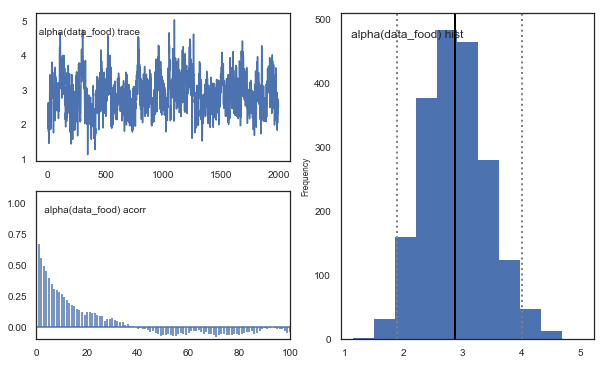

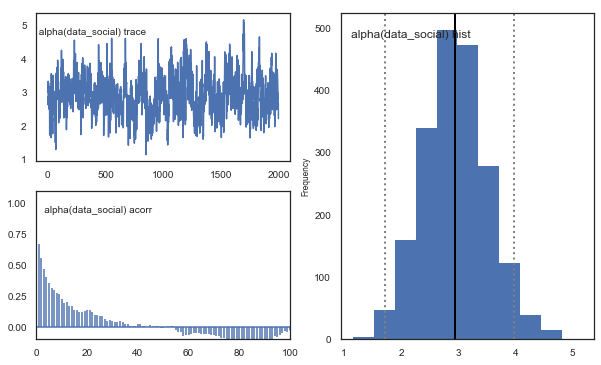

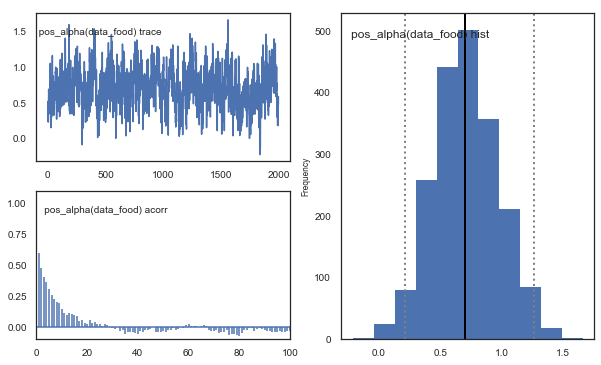

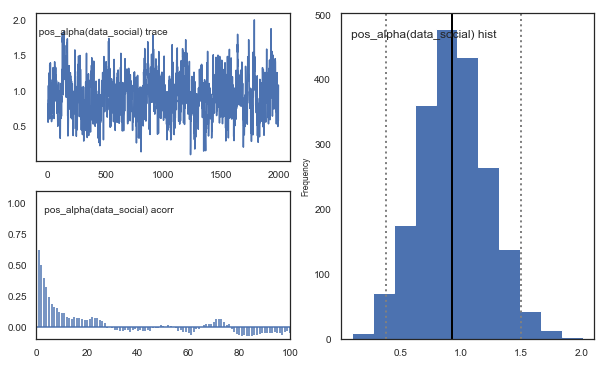

In [55]:
model4.plot_posteriors(['alpha', 'pos_alpha'])

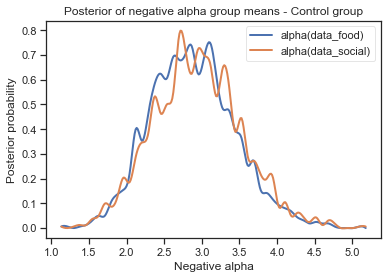

In [127]:
alpha_food_c, alpha_social_c = model4.nodes_db.node[['alpha(data_food)', 'alpha(data_social)']]

hddm.analyze.plot_posterior_nodes([alpha_food_c, alpha_social_c])
plt.xlabel('Negative alpha')
plt.ylabel('Posterior probability')
plt.title('Posterior of negative alpha group means - Control group')
plt.savefig('plot_neg_alpha_controls.pdf')

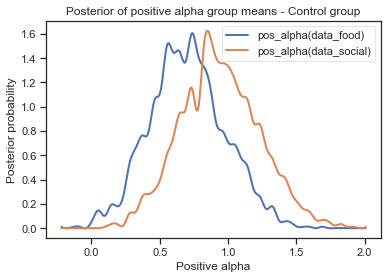

In [128]:
pos_alpha_food_c, pos_alpha_social_c = model4.nodes_db.node[['pos_alpha(data_food)', 'pos_alpha(data_social)']]

hddm.analyze.plot_posterior_nodes([pos_alpha_food_c, pos_alpha_social_c])
plt.xlabel('Positive alpha')
plt.ylabel('Posterior probability')
plt.title('Posterior of positive alpha group means - Control group')
plt.savefig('plot_pos_alpha_controls.pdf')

In [129]:
print("P(negative alpha_social > negative alpha_food) = ", (alpha_social_c.trace() > alpha_food_c.trace()).mean());
print("P(positive alpha_social > positive alpha_food) = ", (pos_alpha_social_c.trace() > pos_alpha_food_c.trace()).mean());

P(negative alpha_social > negative alpha_food) =  0.5335
P(positive alpha_social > positive alpha_food) =  0.7345


In [59]:
traces_c = model4.get_traces()

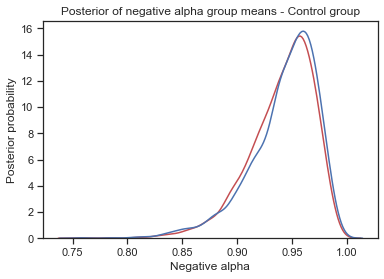

In [131]:
neg_alpha_food_c = np.exp(traces_c['alpha(data_food)'])/(1+np.exp(traces_c['alpha(data_food)']))
neg_alpha_soc_c = np.exp(traces_c['alpha(data_social)'])/(1+np.exp(traces_c['alpha(data_social)']))
sns.kdeplot(neg_alpha_food_c, color='r', label="self img patients: " + str(np.round(np.mean(neg_alpha_food_c),3)))
sns.kdeplot(neg_alpha_soc_c, color='b', label="self img controls: " + str(np.round(np.mean(neg_alpha_soc_c),3)))

plt.xlabel('Negative alpha')
plt.ylabel('Posterior probability')
plt.title('Posterior of negative alpha group means - Control group')
plt.savefig('plot_neg_alpha_controls_trans.pdf')

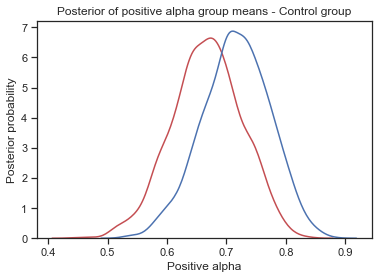

In [132]:
pos_alpha_food_c = np.exp(traces_c['pos_alpha(data_food)'])/(1+np.exp(traces_c['pos_alpha(data_food)']))
pos_alpha_soc_c  = np.exp(traces_c['pos_alpha(data_social)'])/(1+np.exp(traces_c['pos_alpha(data_social)']))
sns.kdeplot(pos_alpha_food_c, color='r', label="self img patients: " + str(np.round(np.mean(pos_alpha_food_c),3)))
sns.kdeplot(pos_alpha_soc_c, color='b', label="self img controls: " + str(np.round(np.mean(pos_alpha_soc_c),3)))

plt.xlabel('Positive alpha')
plt.ylabel('Posterior probability')
plt.title('Posterior of positive alpha group means - Control group')
plt.savefig('plot_pos_alpha_controls_trans.pdf')

In [65]:
a_food_c, a_social_c = model4.nodes_db.node[['a(data_food)', 'a(data_social)']]
print("P(a_food > a_social) = ", (a_food_c.trace() > a_social_c.trace()).mean());

P(a_food > a_social) =  1.0


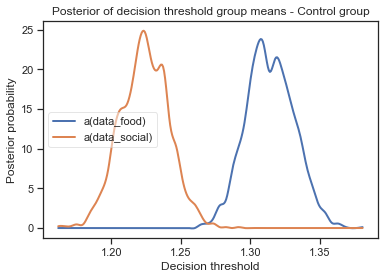

In [133]:
a_food_c, a_social_c = model4.nodes_db.node[['a(data_food)', 'a(data_social)']]

hddm.analyze.plot_posterior_nodes([a_food_c, a_social_c])
plt.xlabel('Decision threshold')
plt.ylabel('Posterior probability')
plt.title('Posterior of decision threshold group means - Control group')
plt.savefig('plot_a_controls.pdf')

In [136]:
v_food_c, v_social_c = model4.nodes_db.node[['v(data_food)', 'v(data_social)']]
print("P(v_food > v_social) = ", (v_food_c.trace() > v_social_c.trace()).mean());

P(v_food > v_social) =  0.909


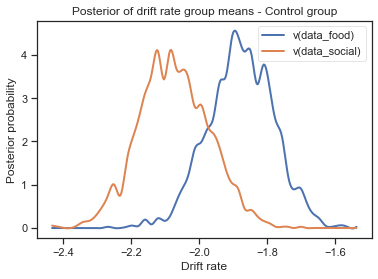

In [140]:
v_food_c, v_social_c = model4.nodes_db.node[['v(data_food)', 'v(data_social)']]

hddm.analyze.plot_posterior_nodes([v_food_c, v_social_c])
plt.xlabel('Drift rate')
plt.ylabel('Posterior probability')
plt.title('Posterior of drift rate group means - Control group')
plt.savefig('plot_v_controls.pdf')

In [137]:
t_food_c, t_social_c = model4.nodes_db.node[['t(data_food)', 't(data_social)']]
print("P(t_food > t_social) = ", (t_food_c.trace() > t_social_c.trace()).mean());

P(t_food > t_social) =  0.019


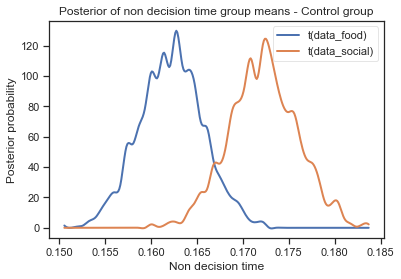

In [138]:
t_food_c, t_social_c = model4.nodes_db.node[['t(data_food)', 't(data_social)']]

hddm.analyze.plot_posterior_nodes([t_food_c, t_social_c])
plt.xlabel('Non decision time')
plt.ylabel('Posterior probability')
plt.title('Posterior of non decision time group means - Control group')
plt.savefig('plot_t_controls.pdf')

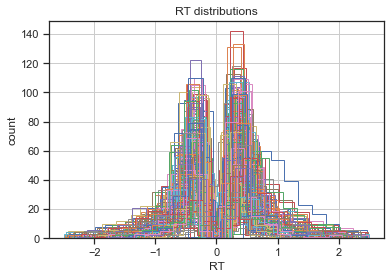

In [142]:
fig = plt.figure()
ax = fig.add_subplot(111, xlabel='RT', ylabel='count', title='RT distributions')
for i, subj_data in datac.groupby('subj_idx'):
    subj_data.rt.hist(bins=20, histtype='step', ax=ax)
plt.savefig('plot_hist_rt_controls.pdf')

In [82]:
fig = plt.figure()
model4.plot_posterior_predictive()
plt.savefig('hddm_ed_rtplot_fig.pdf')

<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

Text(0, 0.5, 'Probability density')

<Figure size 576x432 with 0 Axes>

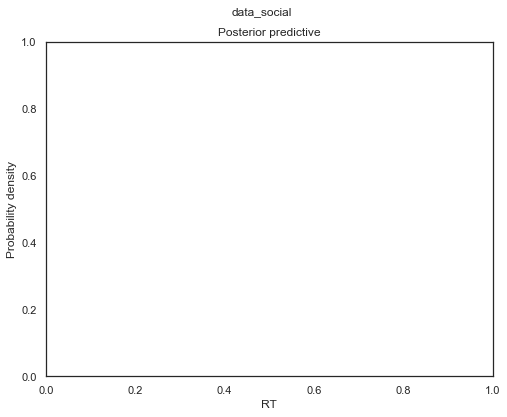

In [85]:
model3.plot_posterior_predictive()
plt.title('Posterior predictive')
plt.xlabel('RT')
plt.ylabel('Probability density')

In [88]:
help(hddm.utils.post_pred_gen)

Help on function post_pred_gen in module kabuki.analyze:

post_pred_gen(model, groupby=None, samples=500, append_data=False, progress_bar=True)
    Run posterior predictive check on a model.
    
    :Arguments:
        model : kabuki.Hierarchical
            Kabuki model over which to compute the ppc on.
    
    :Optional:
        samples : int
            How many samples to generate for each node.
        groupby : list
            Alternative grouping of the data. If not supplied, uses splitting
            of the model (as provided by depends_on).
        append_data : bool (default=False)
            Whether to append the observed data of each node to the replicatons.
        progress_bar : bool (default=True)
            Display progress bar
    
    :Returns:
        Hierarchical pandas.DataFrame with multiple sampled RT data sets.
        1st level: wfpt node
        2nd level: posterior predictive sample
        3rd level: original data index
    
    :See also:
        post

In [90]:
help(hddm.utils.post_pred_stats)

Help on function post_pred_stats in module hddm.utils:

post_pred_stats(data, sim_datasets, **kwargs)
    Calculate a set of summary statistics over posterior predictives.
    
    :Arguments:
        data : pandas.DataFrame
    
        sim_data : pandas.DataFrame
    
    :Optional:
        bins : int
            How many bins to use for computing the histogram.
        evals : dict
            User-defined evaluations of the statistics (by default 95 percentile and SEM).
            :Example: {'percentile': scoreatpercentile}
        plot : bool
            Whether to plot the posterior predictive distributions.
        progress_bar : bool
            Display progress bar while sampling.
    
    :Returns:
        Hierarchical pandas.DataFrame with the different statistics.



In [95]:
print('There are %d participants in the patient group' %data['subj_idx'].nunique())
print('There are %d participants in the patient group' %datac['subj_idx'].nunique())

There are 53 participants in the patient group
There are 268 participants in the patient group
